In [1]:
import stripy as stripy

str_fmt = "{:35} {:3}\t{:6}"


## A bunch of meshes with roughly similar overall numbers of points / triangles

octo0  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=0)
octo2  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=2)
octoR  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=5)

print(str_fmt.format("Octahedral mesh", octo0.npoints, octoR.npoints))


octoF0  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=0)
octoF2  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=2)
octoFR  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=4)

print(str_fmt.format("Octahedral mesh with faces", octoF0.npoints, octoFR.npoints))


cube0 = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=0)
cube2 = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=2)
cubeR = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=5)

print(str_fmt.format("Cube mesh", cube0.npoints, cubeR.npoints))


ico0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0)
ico2 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2)
icoR = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4)

print(str_fmt.format("Icosahedral mesh", ico0.npoints, icoR.npoints))


icoF0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0, include_face_points=True)
icoF2 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2, include_face_points=True)
icoFR = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4, include_face_points=True)

print(str_fmt.format("Icosahedral mesh with faces", icoF0.npoints, icoFR.npoints))


socc0 = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=0)
socc2 = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=1)
soccR = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=3)

print(str_fmt.format("BuckyBall mesh", socc0.npoints, soccR.npoints))


## Need a reproducible hierarchy ... 
ring0 = stripy.spherical_meshes.uniform_ring_mesh(resolution=5, refinement_levels=0)

lon, lat = ring0.uniformly_refine_triangulation()
ring1 = stripy.sTriangulation(lon, lat)

lon, lat = ring1.uniformly_refine_triangulation()
ring2 = stripy.sTriangulation(lon, lat)

lon, lat = ring2.uniformly_refine_triangulation()
ring3 = stripy.sTriangulation(lon, lat)

lon, lat = ring3.uniformly_refine_triangulation()
ringR = stripy.sTriangulation(lon, lat)


# ring2 = stripy.uniform_ring_mesh(resolution=6, refinement_levels=2)
# ringR = stripy.uniform_ring_mesh(resolution=6, refinement_levels=4)

print(str_fmt.format("Ring mesh (9)", ring0.npoints, ringR.npoints))

randR = stripy.spherical_meshes.random_mesh(number_of_points=5000)
rand0 = stripy.sTriangulation(lons=randR.lons[::50],lats=randR.lats[::50])
rand2 = stripy.sTriangulation(lons=randR.lons[::25],lats=randR.lats[::25])

print(str_fmt.format("Random mesh (6)", rand0.npoints, randR.npoints))

Octahedral mesh                       6	  4098
Octahedral mesh with faces           14	  3074
Cube mesh                             8	  6146
Icosahedral mesh                     12	  2562
Icosahedral mesh with faces          32	  7682
BuckyBall mesh                       92	  5762
Ring mesh (9)                        30	  7170
Random mesh (6)                     100	  5000


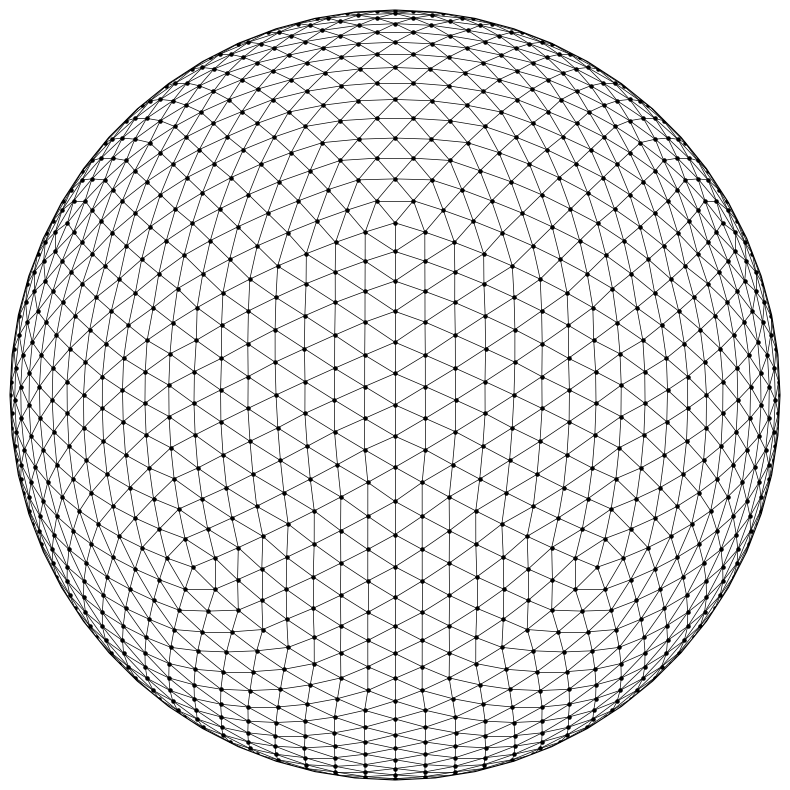

In [14]:
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

global_extent     = [-180.0, 180.0, -90.0, 90.0]

projection1 = ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide(central_longitude=-120)
projection3 = ccrs.PlateCarree()
base_projection = ccrs.PlateCarree()

def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None))
    #ax.coastlines(color="lightgrey")
    ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr


    # ax.scatter(lons0, lats0, color="Red",
    #             marker="o", s=150.0, transform=ccrs.PlateCarree())

    ax.scatter(lonsR, latsR, color="black",
                marker="o", s=5.0, transform=ccrs.PlateCarree())

    
    segs = refined.identify_segments()

    for s1, s2 in segs:
        ax.plot( [lonsR[s1], lonsR[s2]],
                 [latsR[s1], latsR[s2]], 
                 linewidth=0.5, color="black", transform=ccrs.Geodetic())

    fig.savefig(name+".pdf")
    
    return

cmesh = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=3)
fmesh = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=3, include_face_points=True)

mesh_fig(cmesh, fmesh, "Ring")